In [3]:
# Making imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras import callbacks

import pickle

In [6]:
# Reading in data
df = pd.read_csv('../data/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
# Displaying nulls and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [44]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [8]:
# Converting to ppm scale
metrics_conv_dict = {
    'ph':1,
    'Hardness':1,
    'Solids':1,
    'Chloramines':1,
    'Sulfate':1,
    'Conductivity':0.55,
    'Organic_carbon':1,
    'Trihalomethanes':0.001,
    'Turbidity':3,
    'Potability':1
    }

for i in df.columns:
    df[i] = df[i] * metrics_conv_dict[i]

In [9]:
# Finding non null columns to train KNN imputer
non_null_cols = [i for i in df.columns if df[i].isna().sum()==0 and i not in ['Potability']]
non_null_cols

['Hardness',
 'Solids',
 'Chloramines',
 'Conductivity',
 'Organic_carbon',
 'Turbidity']

In [10]:
# Initializing KNNimputer
knn_impute = KNNImputer(n_neighbors=7)

In [11]:
# Imputing nulls using KNN
for i in [x for x in df.columns if x not in non_null_cols]:
    df[i] = knn_impute.fit_transform(df[[i]])
    # non_null_cols.append(i)

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,310.369760,10.379783,0.086991,8.889406,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,326.086948,15.180013,0.056329,13.501969,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,230.233417,16.868637,0.066420,9.167801,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,199.796584,18.436524,0.100342,13.886312,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,219.125947,11.558279,0.031998,12.225226,0.0


(0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 3271    1.0
 3272    1.0
 3273    1.0
 3274    1.0
 3275    1.0
 Name: Potability, Length: 3276, dtype: float64,
 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 3271    1.0
 3272    1.0
 3273    1.0
 3274    1.0
 3275    1.0
 Name: Potability, Length: 3276, dtype: float64)

In [12]:
# Helper function to plot histogram by potable vs. non potable
def plot_hist(df, col):
    plt.figure(figsize=(10,5))
    plt.hist(df.loc[df['Potability']==0][col], alpha=0.8, label='Not Potable')
    plt.hist(df.loc[df['Potability']==1][col], alpha=0.5, label='Potable')
    plt.legend(['Not Potable', 'Potable'])
    plt.xlabel(col)
    plt.show()

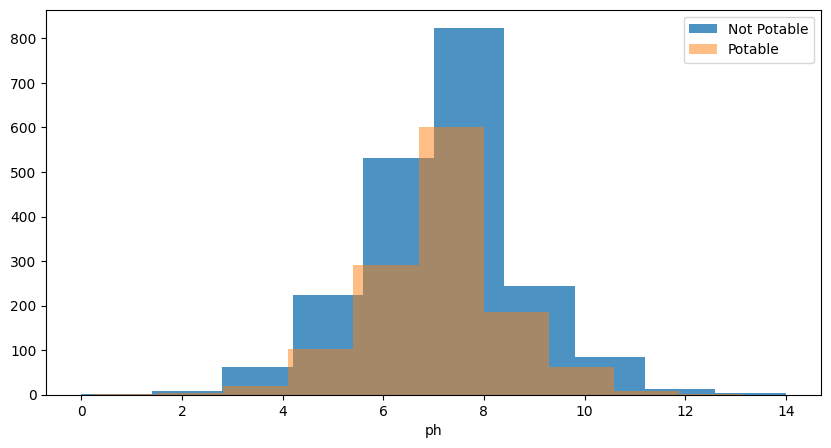

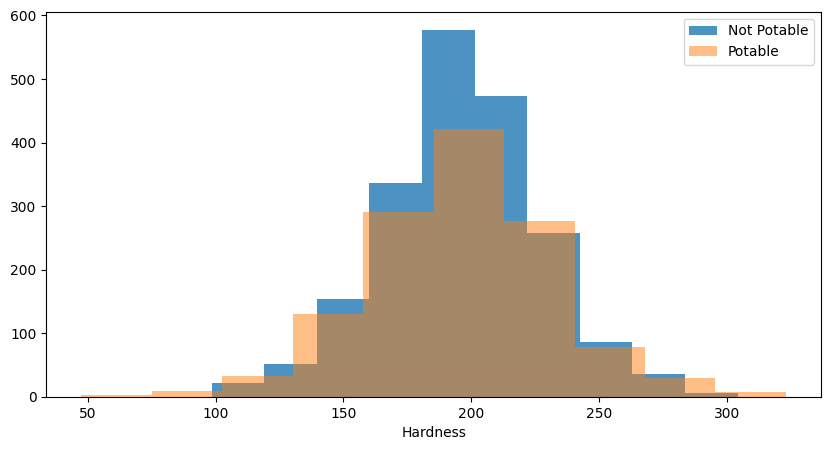

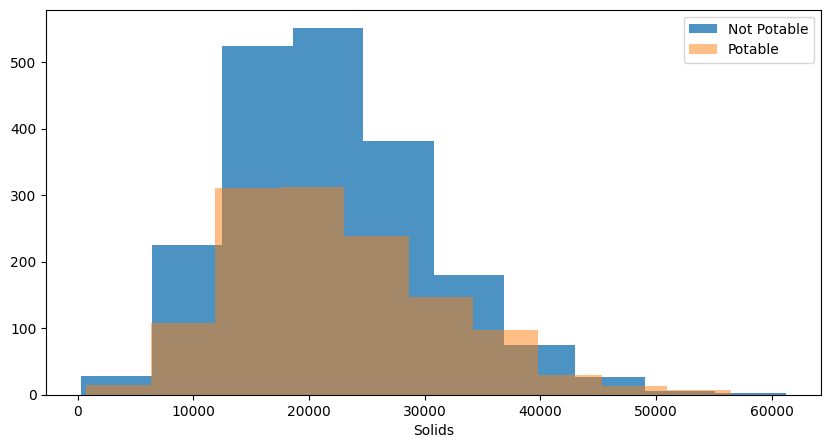

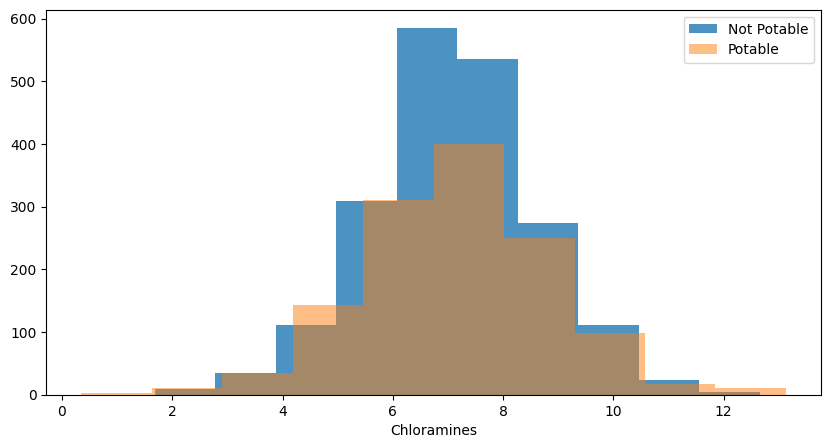

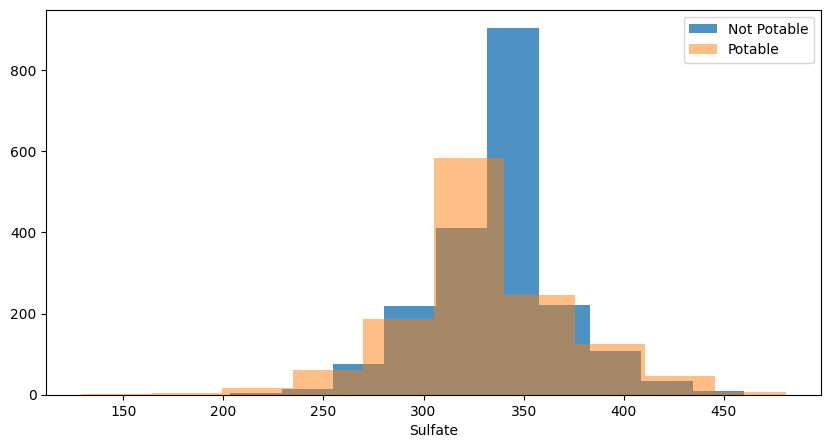

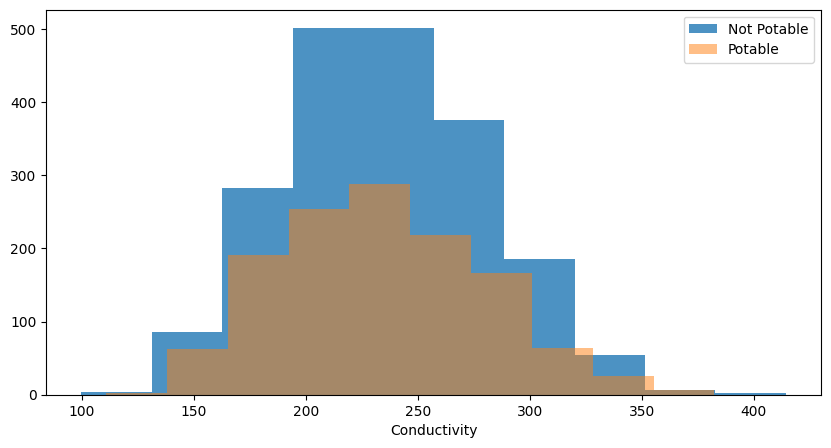

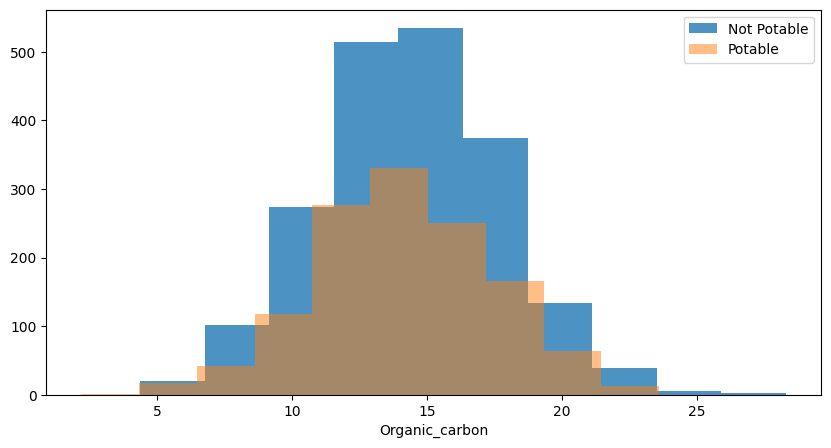

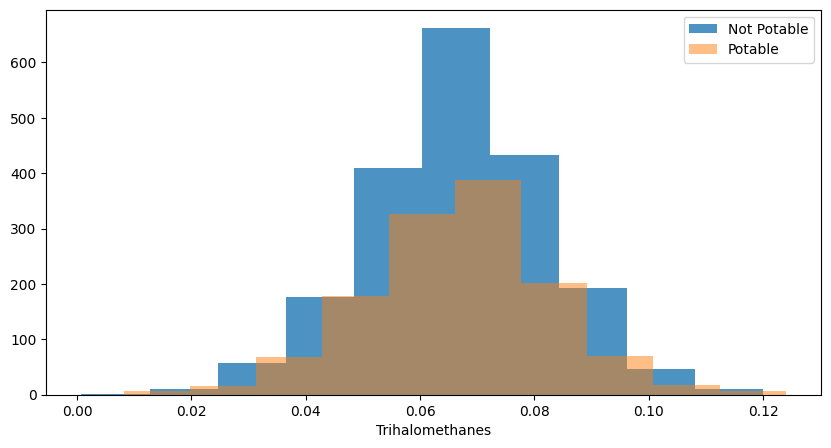

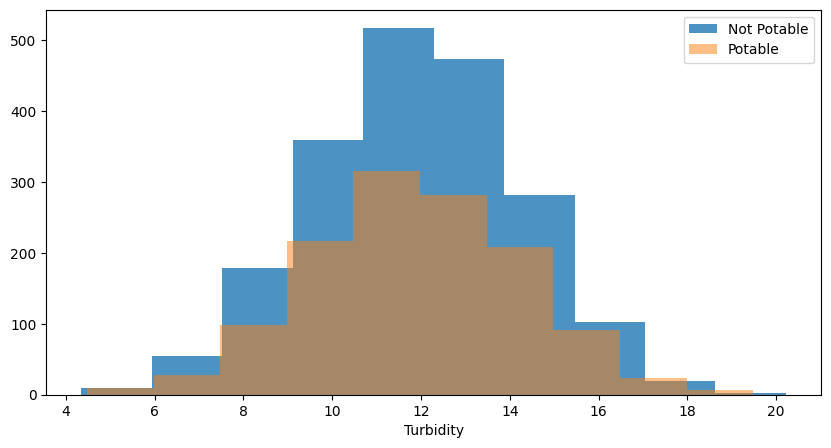

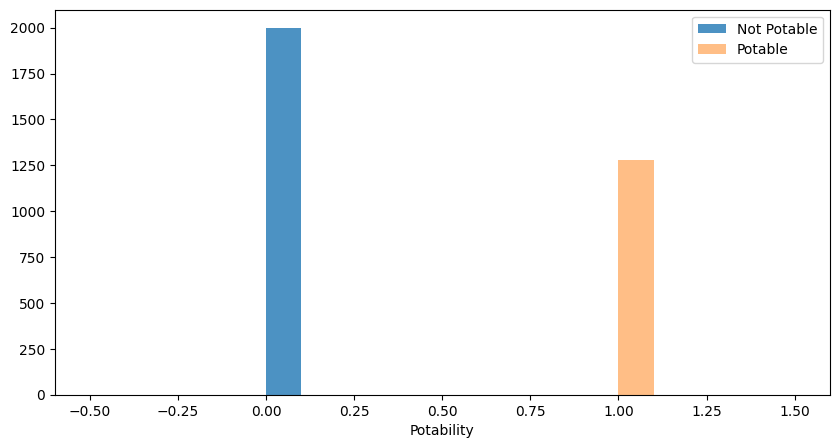

In [13]:
# Plotting histograms for each column
for i in df.columns:
    plot_hist(df, i)

<Axes: >

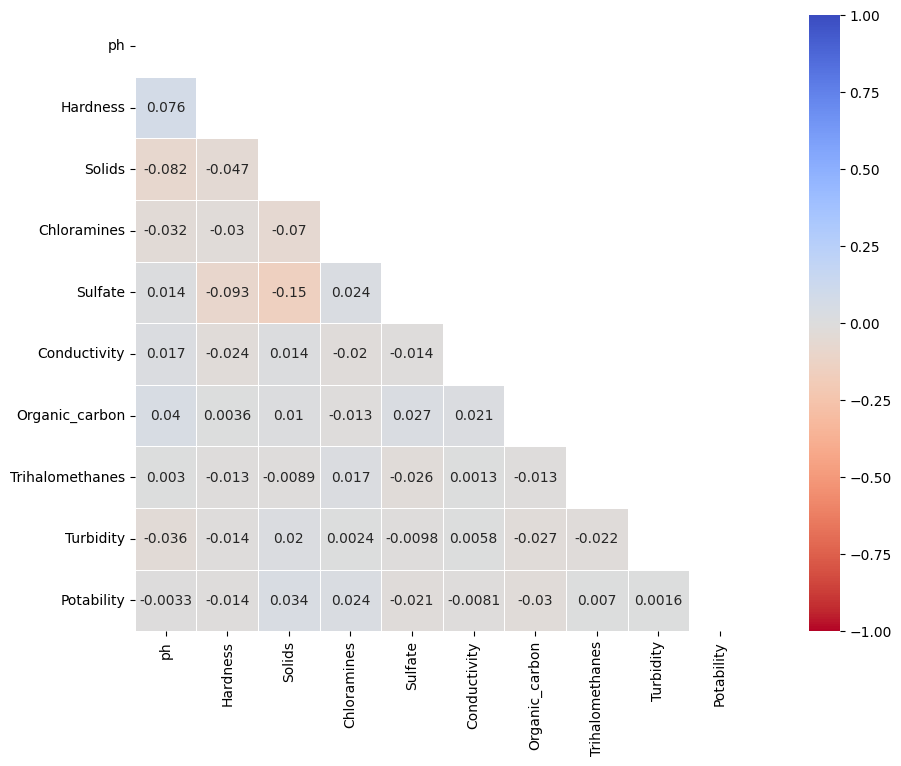

In [14]:
# Generating correlation matrix and heatmap
corr_mat = df.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.figure(figsize=(15,8))
sns.heatmap(corr_mat, mask=mask, cmap='coolwarm_r', vmax=1, center=0, linewidths=.5, vmin=-1, square=True, annot=True)

In [15]:
# Helper function to plot boxplot by potable vs. non potable
def plot_box(df, col):
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Potability', y=col, data=df)
    plt.show()


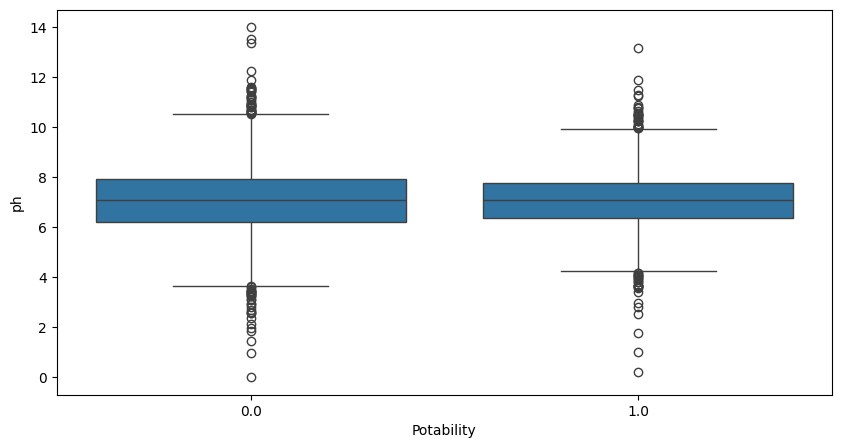

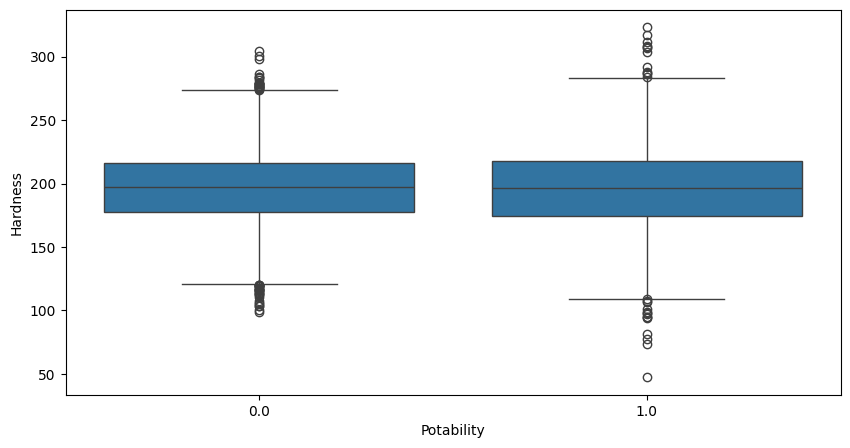

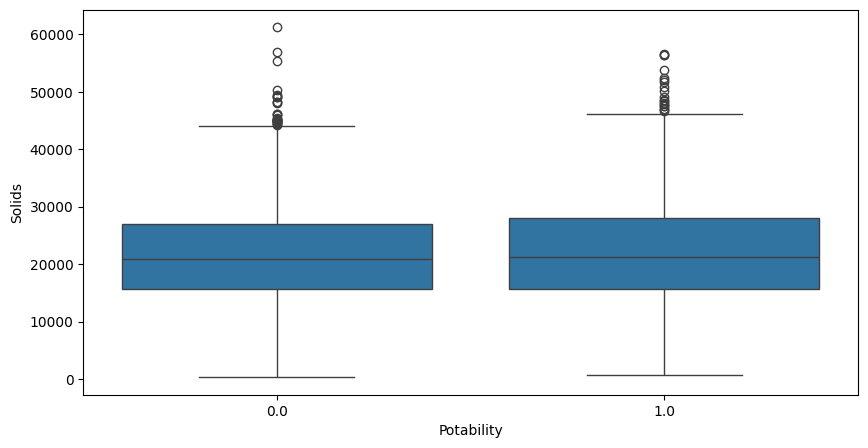

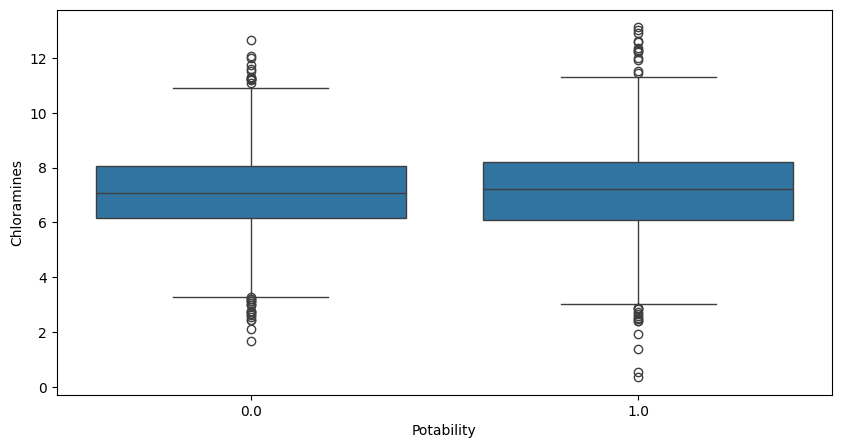

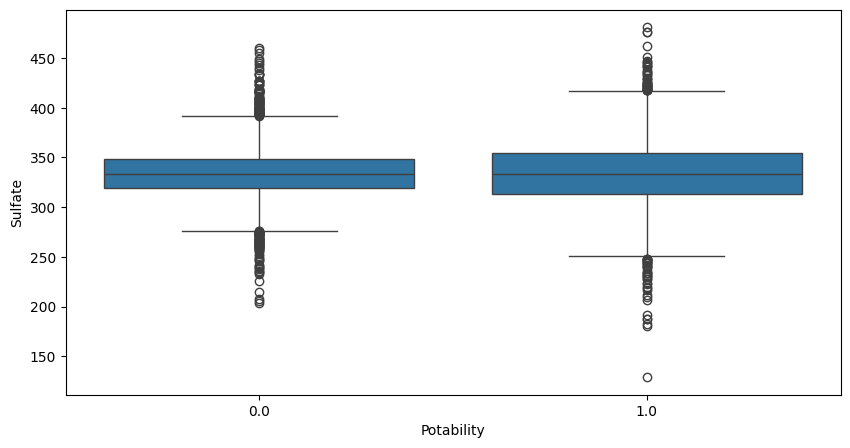

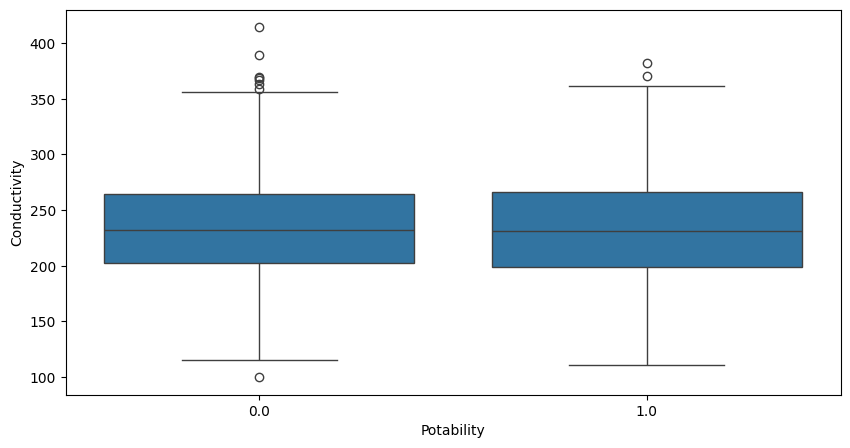

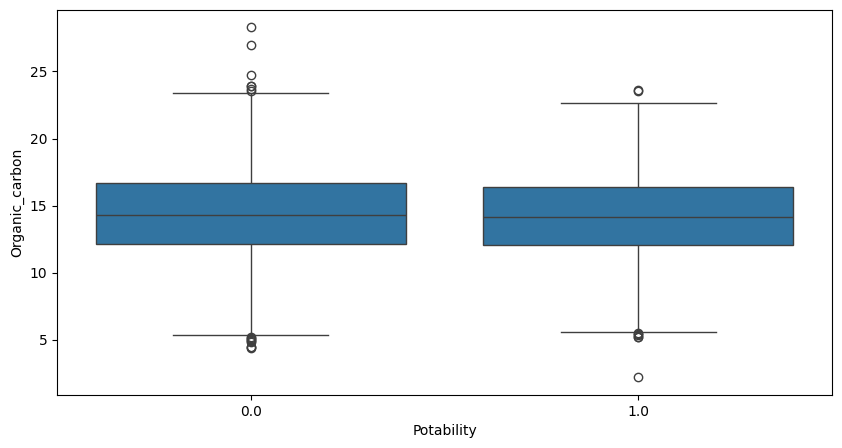

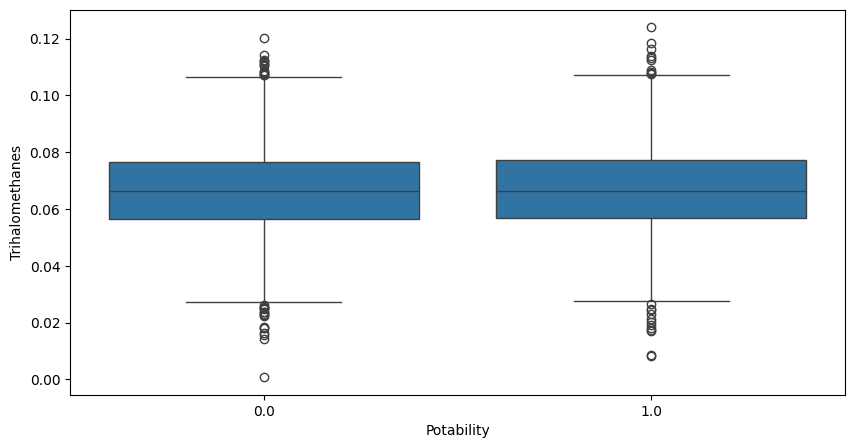

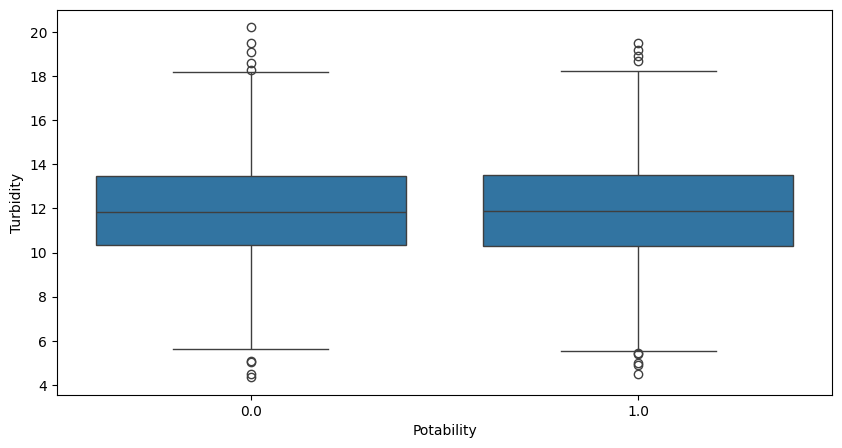

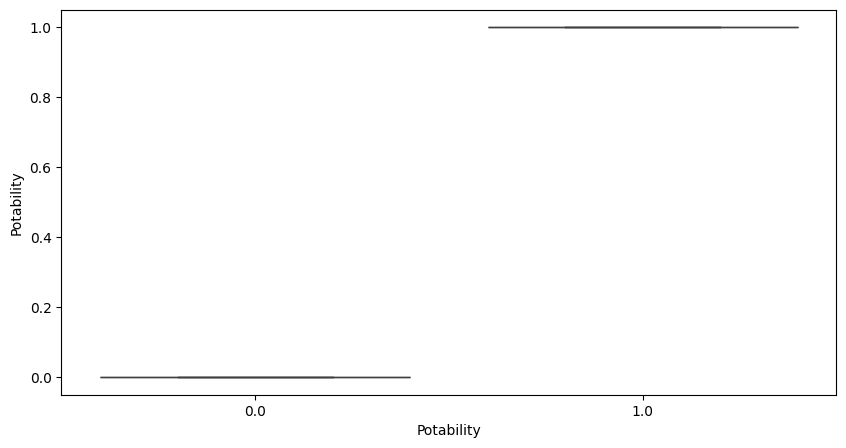

In [16]:
# Plotting boxplot for each column
for i in df.columns:
    plot_box(df, i)

In [48]:
# Baseline model
df['Potability'].value_counts(normalize=True)

0.0    0.60989
1.0    0.39011
Name: Potability, dtype: float64

In [64]:
# Splitting data into train-test split
X = df.drop('Potability', axis=1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Generating Logistic regression pipeline
pipe1 = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression())])
param_grid1 = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Generating grid
grid1 = GridSearchCV(pipe1, param_grid1, cv=5, n_jobs=-1)

# Fitting grid on train data
grid1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [66]:
# Outputting best parameters
grid1.best_params_

{'log_reg__C': 0.1}

In [67]:
# Accuracy on test data
grid1.score(X_train, y_train)

0.6053435114503817

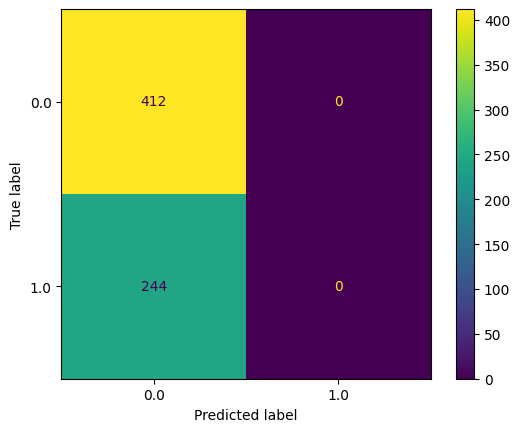

In [68]:
# Confusion Matrix on test data 
ConfusionMatrixDisplay.from_estimator(grid1.best_estimator_, X_test, y_test)

In [69]:
# Generating Random Forest pipeline
pipe2 = Pipeline([('scaler', StandardScaler()), ('rf_clf', RandomForestClassifier())])

param_grid2 = {
    'rf_clf__n_estimators':[400, 600, 800],
    'rf_clf__max_depth':[None, 3, 5]
}

# Generating grid
grid2 = GridSearchCV(pipe2, param_grid2, n_jobs=-1)

In [70]:
# Fitting on train data
grid2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf_clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf_clf__max_depth': [None, 3, 5],
                         'rf_clf__n_estimators': [400, 600, 800]})

In [71]:
# Best params of RF grid
grid2.best_params_

{'rf_clf__max_depth': None, 'rf_clf__n_estimators': 600}

In [72]:
# Accuracy on train
grid2.score(X_train, y_train)

1.0

In [73]:
# Accuracy on test
grid2.score(X_test, y_test)

0.6844512195121951

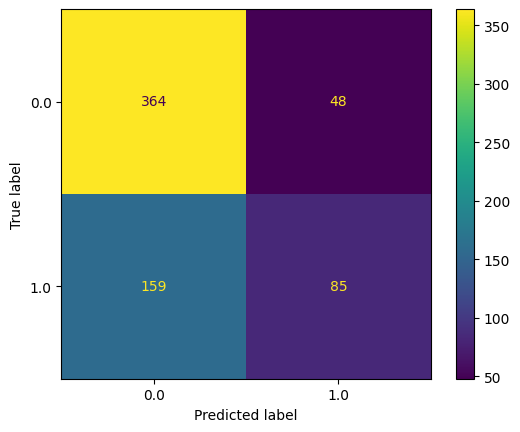

In [74]:
# Generating Confusion Matrix on test data
ConfusionMatrixDisplay.from_estimator(grid2.best_estimator_, X_test, y_test)

In [75]:
# Scaling data for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Creating Neural Network
model = Sequential()
model.add(Dense(9, activation='relu', input_shape=(9,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Adding parameters
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training network
history = model.fit(X_train_scaled, y_train.values, epochs=100, batch_size=25, validation_data=(X_test_scaled, y_test.values))

Epoch 1/100


/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5017 - loss: 0.7165 - val_accuracy: 0.5838 - val_loss: 0.6891
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.5924 - loss: 0.6866 - val_accuracy: 0.6159 - val_loss: 0.6776
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.6106 - loss: 0.6802 - val_accuracy: 0.6174 - val_loss: 0.6713
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6185 - loss: 0.6689 - val_accuracy: 0.6189 - val_loss: 0.6655
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6127 - loss: 0.6709 - val_accuracy: 0.6326 - val_loss: 0.6594
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.6258 - loss: 0.6575 - val_accuracy: 0.6387 - val_loss: 0.6543
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.6317 - loss: 0.6545 - val_accuracy: 0.6402 - val_loss: 0.6502
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.6255 - loss: 0.6536 - val_accu

[]

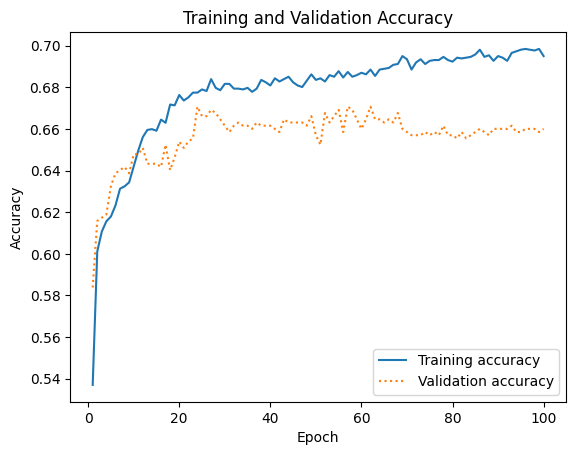

In [76]:
# Plotting accuracy for train and test
acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [77]:
# Making prediction with NN model
y_preds = model.predict(X_test) > 0.5

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


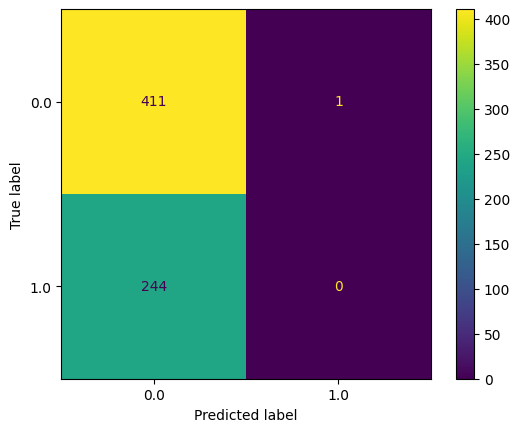

In [78]:
# Generating Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)